In [2]:
import treecorr as tc
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
quasar = np.load('../catalogue/quasar_narrow_z_cut.npy')
random = np.load('../catalogue/random_sample_quasar_narrow_z_cut.npy')

In [4]:
from astropy.cosmology import Planck18 as cosmos
from astropy import units as u
h = cosmos.H0.value
def radecz2xyz(ra, dec, z):
    d = (cosmos.angular_diameter_distance(z)*(z+1)).to(u.Mpc).value*h
    x = d*np.cos(ra)*np.cos(dec)
    y = d*np.sin(ra)*np.cos(dec)
    z = d*np.sin(dec)
    return x, y, z


In [54]:
D = tc.Catalog(ra=quasar['ra'], dec=quasar['dec'], ra_units='deg', dec_units='deg', w=quasar['w'], npatch=100)
R = tc.Catalog(ra=random['ra'], dec=random['dec'], ra_units='deg', dec_units='deg', w=random['w'])

In [55]:
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
z = 1.69
h = cosmos.H0.to(u.km/u.s/u.Mpc).value / 100
d_A = cosmos.angular_diameter_distance(z).to(u.Mpc).value
chi_l = d_A*(1+z)
Nbins = 15
r_bins = np.geomspace(3, 100, Nbins+1)        # unit: cMpc/h
theta_bins = r_bins/h/(1+z)/d_A

In [56]:
config = {'metric': 'Arc', 'max_sep': theta_bins[-1], 'min_sep': theta_bins[0], 'nbins':15, 'sep_units': 'rad', 'var_method':'jackknife'}
DD = tc.NNCorrelation(config=config)
DR = tc.NNCorrelation(config=config)
RR = tc.NNCorrelation(config=config)

DD.process(D)
DR.process(D, R)
RR.process(R)

In [57]:
xi, var_xi = DD.calculateXi(dr=DR, rr=RR)

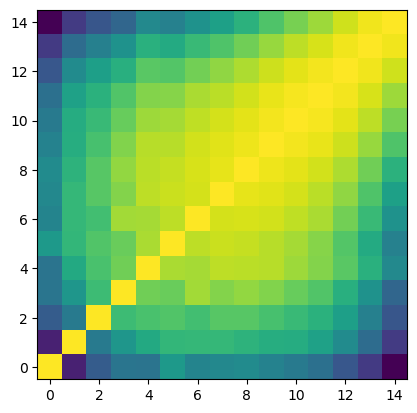

In [59]:
cov = DD.cov
diag = [cov[i,i] for i in range(cov.shape[0])]
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        cov[i,j] /= np.sqrt(diag[i]*diag[j])
plt.imshow(cov, origin='lower')

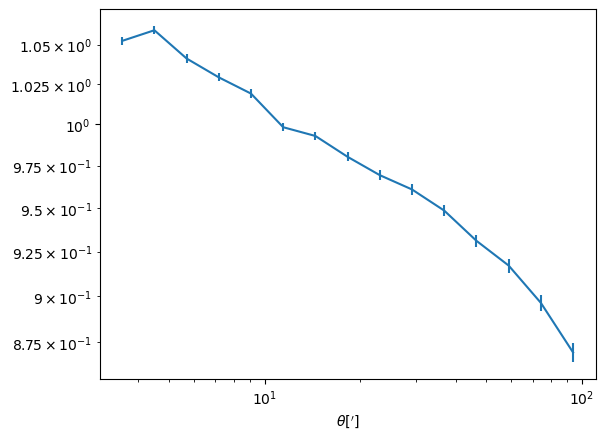

In [58]:
plt.errorbar((np.exp(DD.logr)*u.rad).to(u.arcmin), xi, var_xi)
plt.loglog()
plt.xlabel('$\\theta[\']$')
plt.savefig('./fig/w_theta_old')

<ErrorbarContainer object of 3 artists>

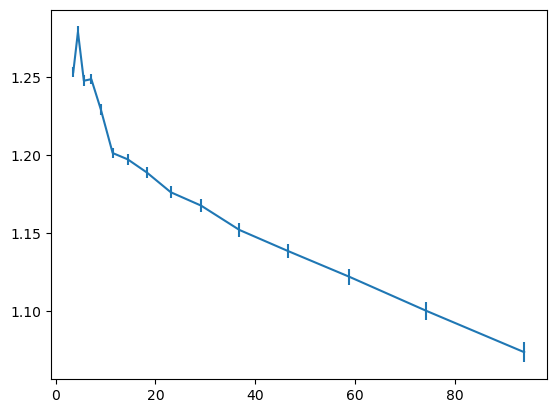

In [50]:
xi, var_xi = DD.calculateXi(dr=DR, rr=RR)
plt.errorbar((np.exp(DD.logr)*u.rad).to(u.arcmin), xi, var_xi)

In [15]:
dd = np.load('../calculation_data/output_dd.npy')
dr = np.load('../calculation_data/output_dr.npy')
rr = np.load('../calculation_data/output_rr.npy')

`dd.sum(axis=0)/2 == DD.npairs`

`dr.sum(axis=0) ~ DR.npairs * 1.43`

In [23]:
Nd = dd.shape[0]
Nr = rr.shape[0]
dd_res = dd.sum(axis=0)/2/(Nd*(Nd-1)/2)     # in my code, I calculated the same stuff twice, so it should be divided by two.
dr_res = dr.sum(axis=0)/(Nd*Nr)
rr_res = rr.sum(axis=0)/2/(Nr*(Nr-1)/2)

In [24]:
result = (dd_res - 2*dr_res + rr_res)/rr_res

In [25]:
theta = np.sqrt(theta_bins[1:]*theta_bins[:-1])

[]

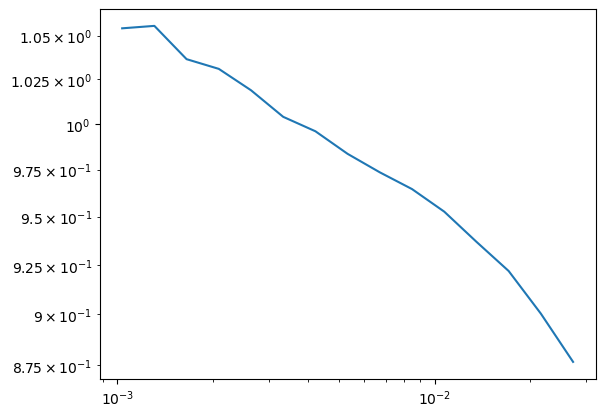

In [26]:
plt.plot(theta, result)
plt.loglog()

3d pair counts. Not done

In [ ]:
r = (cosmos.angular_diameter_distance(quasar['z'])*(quasar['z']+1)).to(u.Mpc).value*h
D = tc.Catalog(ra=quasar['ra'], dec=quasar['dec'], r=r, ra_units='deg', dec_units='deg', w=quasar['w'], npatch=100)
r = (cosmos.angular_diameter_distance(random['z'])*(random['z']+1)).to(u.Mpc).value*h
R = tc.Catalog(ra=random['ra'], dec=random['dec'], r=r, ra_units='deg', dec_units='deg', w=random['w'])
config = {'metric': 'Euclidean', 'max_sep': 100, 'min_sep': 20, 'nbins':15, 'var_method':'jackknife'}
DD = tc.NNCorrelation(config=config)
DR = tc.NNCorrelation(config=config)
RR = tc.NNCorrelation(config=config)

DD.process(D)
DR.process(D, R)
RR.process(R)
xi, var_xi = DD.calculateXi(dr=DR, rr=RR)
cov = DD.cov
diag = [cov[i,i] for i in range(cov.shape[0])]
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        cov[i,j] /= np.sqrt(diag[i]*diag[j])
plt.imshow(cov, origin='lower')